## Graph simplification methodology

This notebook constructs a drivable street network for the municipality of Tibú (Colombia) using OSMnx, and then applies a custom graph simplification procedure designed for regional-scale analysis. The goal is to reduce graph size while preserving connectivity, directionality, and distance information.

The workflow is:

1. **Build the original street network from OpenStreetMap.**

2. **Identify spatially dense groups of nodes using clustering:** Nodes are clustered purely based on spatial proximity, using their (lat, lon) coordinates and the HDBSCAN algorithm. This step identifies areas where many nearby nodes can be safely compressed without altering the large-scale structure of the network: dense urban regions naturally form clusters, while sparse or isolated nodes are classified as noise and left unchanged. 

3. **Collapse each dense group into a single representative node:** For each non-noise cluster the node closest to the cluster centroid is selected as the representative center. All other nodes in the cluster are removed from the simplified graph.

4. **Rewire edges so that shortest-path connectivity is preserved:** For each node outside the cluster that was adjacent to any removed node, shortest paths to the representative center (weighted by edge length) are computed on the original graph and then aggregated into single edges in the simplified graph. This process preserves total travel distance, maintains edge directionality, and ensures that no artificial shortcuts are introduced during the simplification.

5. **Clean the resulting graph so it can be treated as a standard DiGraph:** After clustering and rewiring, the graph remains a MultiDiGraph and may contain structures that complicate analysis. A cleaning step is therefore applied to enforce compatibility with a standard DiGraph: self-loops are removed, as they have no meaningful interpretation in a street network, and parallel edges are resolved by introducing intermediate nodes that preserve the original geometry and edge attributes.

6. **Visualization:**  Optionally, the notebook plots the original and simplified graphs side by side, making the effect of clustering and rewiring visually explicit.

In [4]:
# For constructing the transport network example and simplify it
from src.graph_construction import build_graph, simplify_graph 

In [5]:
# Create the graph from a list of cities
cities = ['Tibú, Colombia']
gdf, G = build_graph(cities)

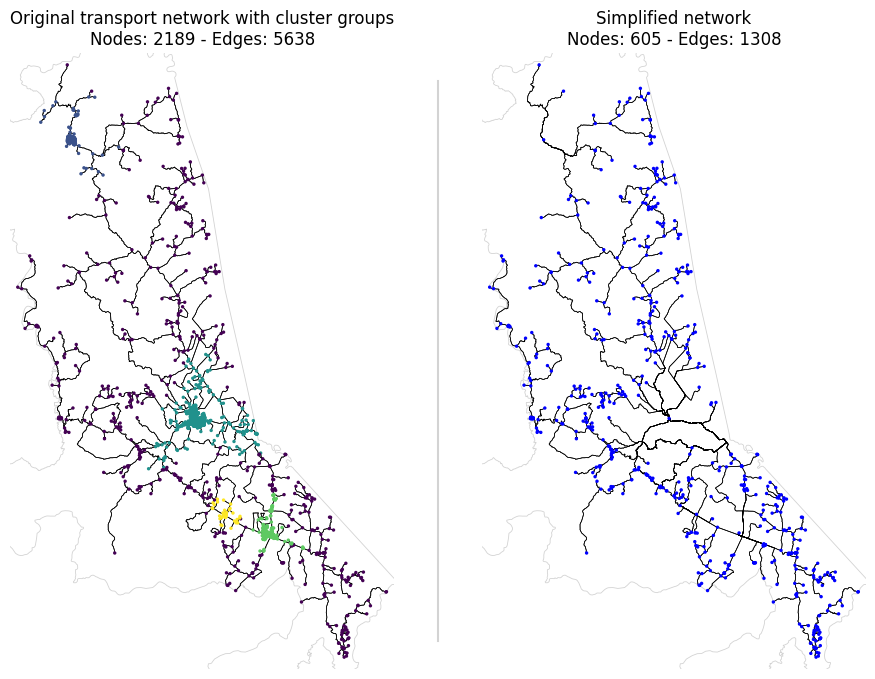

In [6]:
# Simplify the graph
G = simplify_graph(G, gdf, plot = True)